# A Study of Visual Preferences for Map Label Placements

Below is an overview of the data collected from a recent study of visual preferences for map displays. It examines what type of label positions people prefer, and also investigates their decision-making when choosing between map displays that are similarly or equally preferred. This study serves as a first step toward understanding preferences in map displays.

478 college students were asked a series of questions about their map preferences. All participants self-reported that they had vision that was normal or corrected to normal, and 3 participants stated that they were colorblind. Participants were asked how often they use maps in their daily life (9.4\% rarely/never, 35.3\% a few times per month, 40.0\% a few times per week, and 15.3\% daily). They were also asked which digital map applications they have experience with (Google Maps – 83.5\%, Apple Maps – 76.8\%, Waze – 63.6\%, Map My Run – 7.8\%, MapQuest – 4.8\%, Strava – 2.9\%, All Trails – 2.5\%, Other – 3.1\%).

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

part01_path = 'data/part01-pref_survey_responses-2022-04-05-anonymous.csv'
part02_path = 'data/part02-tradeoff_survey_responses-2022-04-05-anonymous.csv'
part03_path = 'data/part03-mlba_responses-2022-04-05-anonymous.csv'
weights_path = 'data/weight-distribution-run77.csv'

part01_all = pd.read_csv(part01_path)
part02_all = pd.read_csv(part02_path)
part03_all = pd.read_csv(part03_path)
weights = pd.read_csv(weights_path)

### Attentive Participants

After completing the introductory questions, the participants completed 3 survey blocks totaling 52 questions. Part III of the study included eight questions with one correct answer. If the instructions were understood and the participant was paying attention, they should consistently get these questions correct. In the results and analysis below, we removed inattentive participants who did not get at least 6 of the 8 questions correct, leaving 292 participants. 

In [40]:
def check_responses(x,correct_responses,threshold):
    correct_count = 0

    for col in x.index:
        if x[col] == correct_responses[col]:
            correct_count += 1

    if correct_count >= threshold:
        return True

    return False

# attention question columns and the correct responses
correct_responses = {'radial1:topleft-medium,left-far,bottomleft-close':4,'radial1:topleft-far,left-close,bottomleft-medium':4,
                     'radial2:topleft-medium,left-far,bottomleft-close':4,'radial2:topleft-far,left-close,bottomleft-medium':4,
                     'grid1:topleft-medium,left-far,bottomleft-close':4,'grid1:topleft-far,left-close,bottomleft-medium':4,
                     'grid2:topleft-medium,left-far,bottomleft-close':4,'grid2:topleft-far,left-close,bottomleft-medium':4}

attention_questions = part03_all[correct_responses.keys()]
attentive = attention_questions.apply(lambda x: check_responses(x,correct_responses,threshold=6), axis=1)

attentive_ids = attention_questions[attentive == True].index
inattentive_ids = attention_questions[attentive == False].index

# create dataframes of attentive participants only
part01_attentive = part01_all.filter(items=attentive_ids,axis=0)
part02_attentive = part02_all.filter(items=attentive_ids,axis=0)
part03_attentive = part03_all.filter(items=attentive_ids,axis=0)

'There were {0} attentive participants'.format(len(attentive_ids))

'There were 292 attentive participants'

## Part I

### Design
Part I of the survey was designed to answer whether users show consistent preferences regarding two attributes of the label: alignment and distance. Participants were presented with a series of binary choice questions in which they were asked to choose the map that they thought was more useful or easy to use in real world scenarios. Each binary choice involved two maps where the labels differed in alignment or distance, but not both. The participants responded to choices between every possible combination of two alignment conditions, chosen from \{top left, direct left, bottom left\} and every combination of two distance conditions chosen from \{close, medium, far\}. When the alignment conditions were compared, the distance of the labels remained fixed in the medium position. When the distance conditions were compared, the alignment of the labels remained fixed at the top left position. Two backgrounds were used to test whether people’s preferences changed when the streets on the map were in a grid pattern compared to a more complicated radial pattern. This resulted in 12 total questions in Part I. In addition to choosing their preferred map, participants were asked to describe the strength of their preference by dragging a marker along a slider with a range of [0,100]. 

<img src="examplemaps.png" height="300" />

### Results
When analyzing the results from Part I, we compared the distribution of responses from both of the map backgrounds (grid and radial) to see if there were statistical differences in people's preferences between the two maps. We did not find statistical differences in the responses between the groups. Therefore, we combined these groups into one for the remainder of the analysis. This resulted in 584 responses for each comparison (2 per participant).

In [57]:
# Part I analysis

# Separate grid from radial responses
radial_responses = part01_attentive[[col for col in part01_attentive.columns if 'pref' not in col and 'radial' in col]]
grid_responses = part01_attentive[[col for col in part01_attentive.columns if 'pref' not in col and 'grid' in col]]

radial_vals = []
grid_vals = []

for radial_col in radial_responses.columns:
    col_parts = radial_col.split(':')
    grid_col = 'grid:' + col_parts[1] + ':' + col_parts[2]
    if len(radial_vals) == 0:
        radial_vals = radial_responses[radial_col].values
        grid_vals = grid_responses[grid_col].values
    else:
        radial_vals = np.concatenate((radial_vals,radial_responses[radial_col].values),axis=0)
        grid_vals = np.concatenate((grid_vals, grid_responses[grid_col].values),axis=0)
        
# Statistically difference between radial and grid?
pval = ttest_ind(radial_vals,grid_vals)[1]

if pval > 0.005:
    print('No statistical difference found (p={0})'.format(pval))
else:
    print('Statistical difference found (p={0})'.format(pval))

No statistical difference found (p=0.12441958630055167)


In [58]:
# rename columns to be the same for both sets
new_radial_columns = {col:col.split(':')[2] for col in radial_responses.columns}
new_grid_columns = {col:col.split(':')[2] for col in grid_responses.columns}
radial_renamed = radial_responses.rename(columns = new_radial_columns)
grid_renamed = grid_responses.rename(columns = new_grid_columns)

# combine columns
pref_responses = pd.concat([radial_renamed,grid_renamed]).reset_index().rename(columns = {'index':'participant_id'})

print('Combined radial and grid groups results in {0} total responses (2 per participant)'.format(len(pref_responses)))
pref_responses[pref_responses['participant_id'] == 3]

Combined radial and grid groups results in 584 total responses (2 per participant)


,participant_id,topleft-bottomleft,bottomleft-left,topleft-left,close-med,med-far,close-far
1,3,2,1,2,1,1,1
293,3,1,1,2,1,1,1


### Part I Analysis

**Alignment Preferences**

When analyzing alignment preferences, we found that the direct left position (66.4\%) was preferred to the bottom left (33.6\%), with a mean preference strength of 50.1 (sd=29.7). Direct left (54.6\%) was also slightly preferred to the top left position (45.4\%), with a mean preference strength of 50.9 (sd=28.8).  Finally, the top left position (62.3\%) was preferred to the bottom left position (37.7\%). The mean preference strength was 49.7 (sd=29.2). 

In [59]:
# combine the grid and radial pref strength sets as well
radial_pref_str_cols = part01_attentive[[col for col in part01_attentive.columns if 'pref:radial' in col]]
grid_pref_str_cols = part01_attentive[[col for col in part01_attentive.columns if 'pref:grid' in col]]

new_radial_pref_str_columns = {col:'pref:' + col.split(':')[3] for col in radial_pref_str_cols.columns}
new_grid_pref_str_columns = {col:'pref:' + col.split(':')[3] for col in grid_pref_str_cols.columns}

radial_pref_str_renamed = radial_pref_str_cols.rename(columns = new_radial_pref_str_columns)
grid_pref_str_renamed = grid_pref_str_cols.rename(columns = new_grid_pref_str_columns)

# combine columns
pref_strengths = pd.concat([radial_pref_str_renamed,grid_pref_str_renamed]).reset_index().rename(columns = {'index':'participant_id'})

# Calculate percentage of responses for each option in each question

# Consider alignment preferences 
for col in ['topleft-bottomleft','bottomleft-left','topleft-left']:
    if col != 'participant_id':
        choices = col.split('-')

        # replace numbers with text
        text_responses = pref_responses[col].replace({i+1:choices[i] for i in range(len(choices))})

        #print(pref_responses[col].value_counts())
        print(text_responses.value_counts(normalize=True))
        print('Mean preference strength:{:.2f}'.format(pref_strengths['pref:' + col].mean()))
        print()

topleft       0.623288
bottomleft    0.376712
Name: topleft-bottomleft, dtype: float64
Mean preference strength:49.70

left          0.664384
bottomleft    0.335616
Name: bottomleft-left, dtype: float64
Mean preference strength:50.80

left       0.546233
topleft    0.453767
Name: topleft-left, dtype: float64
Mean preference strength:50.85



**Distance Preferences**

When analyzing distance preferences, we found that medium positions (79.3\%) were preferred to close positions (20.7\%), with a mean preference strength of 51.1 and a standard deviation of 28.8. Far distances (73.5\%) was also preferred to close (26.5\%), with a mean preference strength of 49.2 and a standard deviation of 29.2. Medium distance positions (67.8\%) were preferred to the far positions (32.2\%) with a mean preference strength of 44.2 (sd=30.4). 

In [21]:
# Consider distance preferences 
for col in ['close-med','med-far','close-far']:
    if col != 'participant_id':
        choices = col.split('-')

        # replace numbers with text
        text_responses = pref_responses[col].replace({i+1:choices[i] for i in range(len(choices))})

        #print(pref_responses[col].value_counts())
        print(text_responses.value_counts(normalize=True))
        print('Mean preference strength:{:.2f}'.format(pref_strengths['pref:' + col].mean()))
        print()

med      0.792808
close    0.207192
Name: close-med, dtype: float64
Mean preference strength:51.07

med    0.678082
far    0.321918
Name: med-far, dtype: float64
Mean preference strength:44.21

far      0.734589
close    0.265411
Name: close-far, dtype: float64
Mean preference strength:49.22



## Part II

### Design

Part II considers how user preferences across multiple dimensions may be combined when choosing an overall preferred label position. However, instead of choosing between positions that differ in a single attribute, participants were asked to rank three positions that differ in both distance and alignment. We considered two sets of three maps on four different backgrounds (2 with streets in a grid pattern and 2 in a radial pattern). This resulted in a total of 12 questions. 

### Results

The two label sets described in the methodology above were shown on four different map backgrounds. We compared the distribution of responses for each background map group and found no statistical differences between them. Therefore, we combined the four groups into one, resulting in 1168 responses for each trade-off set (4 per participant). 

In [22]:
# Part II analysis

# compare map groups for significance in each question and rank
ranks = ['rank1','rank2','rank3']
maps = ['radial1','radial2','grid1','grid2']
found = False

# calculate p values for every combination of map and rank
for r in ranks:
    for m1 in maps:
        for m2 in maps:
            maptype1_vals = []
            maptype2_vals = []

            if m1 != m2:
                maptype1_responses = part02_attentive.filter(like='{0}:{1}:'.format(r,m1))
                maptype2_responses = part02_attentive.filter(like='{0}:{1}:'.format(r,m2))

                for maptype1_col in maptype1_responses.columns:
                    col_parts = maptype1_col.split(':')
                    maptype2_col = '{0}:{1}:{2}'.format(col_parts[0],m2,col_parts[2])

                    # concatenate values
                
                    maptype1_vals = maptype1_vals + list(maptype1_responses[maptype1_col].values)
                    maptype2_vals = maptype2_vals + list(maptype2_responses[maptype2_col].values)

                pval = ttest_ind(maptype1_vals,maptype2_vals)[1]

                if pval <= 0.005:
                    print('{0}:{1} vs {0}:{2} - Statistical difference found (p={3})'.format(r,m1,m2,pval))
                    found = True

if not found:
    print('No statistical differences found')    


No statistical differences found


In [23]:
# Combine map groups into 1 (4 responses per participant per question)

maps = ['radial1','radial2','grid1','grid2']
tradeoff_responses = pd.DataFrame()

# rename columns to be the same for both sets
for m in maps:
    map_responses = part02_attentive.filter(like=m)

    new_columns = {col:str(col.split(':')[0] + ':' + col.split(':')[2]) for col in map_responses.columns}
    
    response_cols_renamed = map_responses.rename(columns = new_columns)

    # combine columns
    tradeoff_responses = pd.concat([tradeoff_responses,response_cols_renamed])

tradeoff_responses = tradeoff_responses.reset_index().rename(columns = {'index':'participant_id'})
print('Combined radial and grid groups results in {0} total responses (4 per participant)'.format(len(tradeoff_responses)))
tradeoff_responses[tradeoff_responses['participant_id'] == 3]


Combined radial and grid groups results in 1168 total responses (4 per participant)


,participant_id,"rank1:topleft-medium,left-far,bottomleft-close","rank2:topleft-medium,left-far,bottomleft-close","rank3:topleft-medium,left-far,bottomleft-close","rank1:topleft-far,left-close,bottomleft-medium","rank2:topleft-far,left-close,bottomleft-medium","rank3:topleft-far,left-close,bottomleft-medium"
1,3,3,2,1,3,2,1
293,3,3,1,2,3,1,2
585,3,3,1,2,2,3,1
877,3,3,1,2,2,3,1


### Part II Analysis

When considering Label Set 1 (see Figure \ref{fig:label1setranking}), we note that participants ranked (top left, medium) more often in first place (73.4\%), while (bottom left, close) is more often ranked in last place (61.7\%). In Label Set 2 (see Figure \ref{fig:label1setranking}), we see that there is a clear preference for ranking (top left, far) first (64.2\%), (direct left, close) second, and (bottom left, medium) third (63.1\%). 

In [24]:
tradeoff_responses['rank1:topleft-medium,left-far,bottomleft-close'].replace({1:'topleft-medium',2:'left-far',3:'bottomleft-close'}).value_counts(normalize=True)

topleft-medium      0.733733
left-far            0.155822
bottomleft-close    0.110445
Name: rank1:topleft-medium,left-far,bottomleft-close, dtype: float64

In [25]:
tradeoff_responses['rank2:topleft-medium,left-far,bottomleft-close'].replace({1:'topleft-medium',2:'left-far',3:'bottomleft-close'}).value_counts(normalize=True)

left-far            0.579623
bottomleft-close    0.272260
topleft-medium      0.148116
Name: rank2:topleft-medium,left-far,bottomleft-close, dtype: float64

In [26]:
tradeoff_responses['rank3:topleft-medium,left-far,bottomleft-close'].replace({1:'topleft-medium',2:'left-far',3:'bottomleft-close'}).value_counts(normalize=True)

bottomleft-close    0.617295
left-far            0.264555
topleft-medium      0.118151
Name: rank3:topleft-medium,left-far,bottomleft-close, dtype: float64

In [27]:
tradeoff_responses['rank1:topleft-far,left-close,bottomleft-medium'].replace({1:'topleft-far',2:'left-close',3:'bottomleft-medium'}).value_counts(normalize=True)

topleft-far          0.642979
left-close           0.220890
bottomleft-medium    0.136130
Name: rank1:topleft-far,left-close,bottomleft-medium, dtype: float64

In [28]:
tradeoff_responses['rank2:topleft-far,left-close,bottomleft-medium'].replace({1:'topleft-far',2:'left-close',3:'bottomleft-medium'}).value_counts(normalize=True)

left-close           0.535103
bottomleft-medium    0.232877
topleft-far          0.232021
Name: rank2:topleft-far,left-close,bottomleft-medium, dtype: float64

In [29]:
tradeoff_responses['rank3:topleft-far,left-close,bottomleft-medium'].replace({1:'topleft-far',2:'left-close',3:'bottomleft-medium'}).value_counts(normalize=True)

bottomleft-medium    0.630993
left-close           0.244007
topleft-far          0.125000
Name: rank3:topleft-far,left-close,bottomleft-medium, dtype: float64

### Part II Discussion

Most of the participants appeared to prioritize alignment over distance information in both scenario. A visualization of the options that the participants ranked first in Label Set 1 and Label Set 2 can be seen in the Sankey diagram below. As a group, most of the participants (Label Set 1: 73.4\%, Label Set 2: 64.2\%) ranked the labels placed at the (top left, medium) position. 78.2\% of those who chose the top left label in Label Set 1, chose the (top left, far) label position in Label Set 2.

<img src="sankey-diagram-tradeoffs.png" width="400">

If participants had prioritized distance information, then (top left, far) would not have been so strongly preferred in Label Set 2, compared to the small number of responses (39.6\%) that ranked (direct left, far) in Label Set 1. In fact, of
the participants who chose (direct left, far) in Label Set 1, the largest proportion (39.6\%) continued to prefer left aligned labels (direct left, close) in Label Set 2.

Although most of the participants appeared to focus on the alignment of labels, there was a minority who appeared to take distance information into account. Of those who chose the position (top left, medium) in Label Set 1, 16.9\% shifted their decision to (direct left, close) and 4.9\% shifted to (bottom left, medium) in Label Set 2. This is in line with the distance preferences we observed in Part I, with people preferring closer labels to those farther away.

When comparing these results with those found in Part I, we found some similarities. In Part I, we found that people generally preferred bottom left positions the least, and this was also seen in Part II. In fact, when considering (bottom left, medium) in Label Set 2, we found that people's preference for medium positions in Part I seems to be overpowered by their preference against the bottom left position. With that exception, we found that people preferred the medium and far placed positions to close positions, as we also found in Part I.

In [30]:
# Generate text for Sankey diagram (to be pasted into https://sankeymatic.com/build/)
tradeoff1_text_responses = tradeoff_responses['rank1:topleft-medium,left-far,bottomleft-close'].replace({1:'topleft-medium',2:'left-far',3:'bottomleft-close'})
tradeoff2_text_responses = tradeoff_responses['rank1:topleft-far,left-close,bottomleft-medium'].replace({1:'topleft-far',2:'left-close',3:'bottomleft-medium'})

sankey_counts = pd.concat([tradeoff1_text_responses,tradeoff2_text_responses],axis=1).value_counts()

for (src,dest) in sankey_counts.index:
    print('{0}\t[{1}]\t{2}'.format(src,sankey_counts[(src,dest)],dest))

topleft-medium	[670]	topleft-far
topleft-medium	[145]	left-close
left-far	[73]	left-close
bottomleft-close	[72]	bottomleft-medium
left-far	[64]	topleft-far
left-far	[45]	bottomleft-medium
topleft-medium	[42]	bottomleft-medium
bottomleft-close	[40]	left-close
bottomleft-close	[17]	topleft-far


## Part III 

### Design

In Part III, we wanted to investigate whether context effects are observed when people choose between equally preferred options. Context effects occur when adding a third option to a choice set causes a violation of expected utility. Three context effects are prominent in the literature, including similarity, attraction, and compromise. The similarity effect is produced by adding a competing alternative that is similar to the choice set, while the attraction effect can be observed when adding a dominated alternative (i.e., one that is less preferred to all other alternatives in the choice set). Finally, the compromise effect is produced by adding an alternative that is less extreme in some dimension, compared to the other choices. These effects have been observed across many paradigms, but to our knowledge, they have not been explored in a rich visual environment such as map displays. To test for these effects, we chose questions that should produce contextual effects if they are present.

### Results

We again tested for statistical differences in people's responses on the different map backgrounds and found none. We combined the responses, resulting in 1168 total responses in Part III (4 per participant).


In [31]:
# Part III Analysis

# Check for statistical difference between map groups
maps = ['radial1','radial2','grid1','grid2']
found = False

# calculate p values for every combination of map and rank
for m1 in maps:
    for m2 in maps:
        maptype1_vals = []
        maptype2_vals = []

        if m1 != m2:
            maptype1_responses = part03_attentive.filter(like='{0}:{1}:'.format(r,m1))
            maptype2_responses = part03_attentive.filter(like='{0}:{1}:'.format(r,m2))

            for maptype1_col in maptype1_responses.columns:
                col_parts = maptype1_col.split(':')
                maptype2_col = '{0}:{1}:{2}'.format(col_parts[0],m2,col_parts[2])

                # concatenate values
                maptype1_vals = maptype1_vals + list(maptype1_responses[maptype1_col].values)
                maptype2_vals = maptype2_vals + list(maptype2_responses[maptype2_col].values)

            pval = ttest_ind(maptype1_vals,maptype2_vals)[1]

            if pval <= 0.005:
                print('{0}:{1} vs {0}:{2} - Statistical difference found (p={3})'.format(r,m1,m2,pval))
                found = True

if not found:
    print('No statistical differences found')    



No statistical differences found


In [34]:
# Combine map type groups (resulting in 4 responses per participant)

maps = ['radial1','radial2','grid1','grid2']
context_responses = pd.DataFrame()

# rename columns to be the same for both sets
for m in maps:
    map_responses = part03_attentive.filter(like=m)

    new_columns = {col:col.split(':')[1] for col in map_responses.columns}
    
    response_cols_renamed = map_responses.rename(columns = new_columns)

    # we will need this information in a later step to identify correct choices
    response_cols_renamed['map_id'] = m

    # combine columns
    context_responses = pd.concat([context_responses,response_cols_renamed])

context_responses = context_responses.reset_index().rename(columns = {'index':'participant_id'})
print('Combined radial and grid groups results in {0} total responses (4 per participant)'.format(
    len(context_responses)))
context_responses[context_responses['participant_id'] == 3]

# Check for statistical difference between Part II and Part III questions that share the same tradeoffs
r1_tradeoff_responses = tradeoff_responses.filter(like='rank1')
context_tradeoff_responses = pd.DataFrame()

# get matching responses from context effect questions
for col in r1_tradeoff_responses.columns:
    col_parts = col.split(':')
    qtype = col_parts[1]

    context_tradeoff_responses = pd.concat([context_tradeoff_responses,context_responses[qtype]],axis=1)

# check for statistical differences
tradeoff_vals = []
context_vals = []

for tradeoff_col in r1_tradeoff_responses.columns:
    col_parts = tradeoff_col.split(':')
    context_col = col_parts[1]

    tradeoff_vals = tradeoff_vals + list(r1_tradeoff_responses[tradeoff_col].values)
    context_vals = context_vals + list(context_tradeoff_responses[context_col].values)
        
# Statistically difference between radial and grid?
pval = ttest_ind(tradeoff_vals,context_vals)[1]

if pval > 0.005:
    print('No statistical difference found (p={0})'.format(pval))
else:
    print('Statistical difference found between Part II and Part III responses (p={0})'.format(pval))

### Set up a dictionary to keep track of the question types for remaining code
qtypes = {
    'similarity1': 'left-medium,topright-far2,topleft-far3',
    'similarity2': 'left-medium,topright-far2,right-close',
    'attraction1': 'right-close,right-medium,bottomleft-far1',
    'attraction2': 'right-close,bottomleft-far1,bottomleft-far2',
    'compromise': 'right-close,bottomright-far,topright-far2',
    'other1': 'topleft-medium,left-far,bottomleft-close',
    'other2': 'topleft-far,left-close,bottomleft-medium',
}


Combined radial and grid groups results in 1168 total responses (4 per participant)
Statistical difference found between Part II and Part III responses (p=0.0)


### Part III Discussion (Comparison with Part II)
Part III asked participants to choose the label position that best represented their boss's preferences. Eight of the questions replicated Label Set 1 and Label Set 2 from Part II, on four backgrounds. However, in this part of the survey, participants needed to respond using the boss's preferences, rather than their own. In all of these questions, there was a single correct answer. We compared the distributions of the responses from Part II and Part III and found that they were significantly different ($P < 0.005$). The figure below shows a comparison between each group's responses for each question. In Part II, we see that, while there was a clear majority in favor of one particular label position in each question, minority groups still preferred the less popular option in each case. However, in Part III, nearly all participants chose the option that correctly aligned with the boss's preferences. These results seem to indicate that the participants understood the instructions to choose maps using the boss's preferences in Part III.

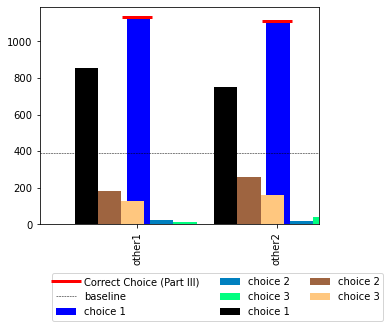

In [35]:
# Generate graphic of comparing tradeoff questions to context questions

context_other1 = context_tradeoff_responses[qtypes['other1']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_other2 = context_tradeoff_responses[qtypes['other2']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_other_counts = pd.concat([context_other1,context_other2],axis=1).transpose().rename(
    index={qtypes['other1']:'other1',
           qtypes['other2']:'other2'})

tradeoff1 = tradeoff_responses['rank1:{0}'.format(qtypes['other1'])].replace(
        {1: 'choice 1',2:'choice 2',3:'choice 3'}).value_counts()
tradeoff2 = tradeoff_responses['rank1:{0}'.format(qtypes['other2'])].replace(
        {1: 'choice 1',2:'choice 2',3:'choice 3'}).value_counts()

tradeoff_other_counts = pd.concat([tradeoff1,tradeoff2],axis=1).transpose().rename(
        index={'rank1:{0}'.format(qtypes['other1']):'other1',
               'rank1:{0}'.format(qtypes['other2']):'other2'})

ax = context_other_counts.plot.bar(position=0.15, cmap='winter', width=0.5, figsize=(5,4))

tradeoff_other_counts.plot.bar(ax = ax, position=0.9, cmap='copper', width=0.5)

context_other_counts['choice 1'].plot(
        ax = ax, ms=30, marker='_', color='red', markeredgecolor='red', markeredgewidth=3, 
        linewidth=0, label = 'Correct Choice (Part III)', rot=90)

ax.axhline(y=int(len(context_tradeoff_responses) / 3), linestyle='--', color='black', linewidth=0.5, label = 'baseline')
ax.legend(bbox_to_anchor =(1.25, -0.2), ncol=3)

### Part III Discussion (Context Effect Questions)

The remaining questions in Part III of the survey were included to see if similarity, attraction, and compromise effects occur in the rich visual environment of a map. Recall that given the boss's preferences, the three label positions compared in each question either had equal preference values (to test for the similarity and compromise effect), or near equal preference values (to test for the attraction effect). For the questions that were equal (similarity and compromise), we would expect that if the participants made the choice randomly among positions of equal value, each choice would receive 33.3\% of the responses. In the case of questions testing the attraction effect, where one option is slightly less preferred by the boss, we would expect the less preferred option to get the least number of responses and the remaining responses to be evenly distributed among the other two. 

We can see from the figure below that participants did not randomly choose label positions among those with equal preference values. Although the context effect option is the most popular in the first similarity set (57.0\%), it is not very popular in the second similarity set (23.1\%). Instead, it seems that people chose the (direct left, medium) aligned option by a large majority in both of these questions (similarity1: 57.0\%, similarity2: 56.7\%). In the attraction questions, the dominated option is chosen much less often than the other two, and the responses are nearly equally distributed between the remaining two options (attraction1 - choice1: 43.2\%, choice3: 46.0\%, attraction2 - choice 1: 45.4\%, choice 2: 49.6\%), with the (bottom left, far1) position being slightly preferred in both cases.  Compromise questions may show a weak effect, with the contextual choice slightly preferred (47.3\%) over the other two options. 

Rather than exhibiting context effects in these questions, the participants seem to be choosing a preferred option given some other internal method. The participants were instructed to break ties by choosing the position they thought was best, so their choices may have been moderated by their own preferences, as the boss would have been indifferent between the label positions. Many of the existing studies in the literature use values that are objective (i.e., decisions being based on the strength of eyewitness testimony, or by choosing the area of a rectangle, such that they may not evoke strong personal preferences or be open to interpretation. 

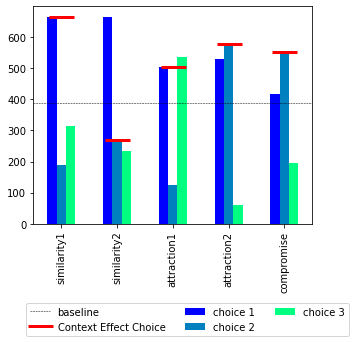

In [36]:
# Count how many people chose the context choice option for each map and context choice combination

maps = ['radial1','radial2','grid1','grid2']

similarity1_correct = 0
similarity2_correct = 0
attraction1_correct = 0
attraction2_correct = 0
compromise_correct = 0

for m in maps:
    similarity1_correct += len(context_responses[(context_responses['map_id'] == m) & (context_responses[qtypes['similarity1']] == 4)])
    similarity2_correct += len(context_responses[(context_responses['map_id'] == m) & (context_responses[qtypes['similarity2']] == 5)])
    attraction1_correct += len(context_responses[(context_responses['map_id'] == m) & (context_responses[qtypes['attraction1']] == 4)])
    attraction2_correct += len(context_responses[(context_responses['map_id'] == m) & (context_responses[qtypes['attraction2']] == 5)])
    compromise_correct += len(context_responses[(context_responses['map_id'] == m) & (context_responses[qtypes['compromise']] == 5)])

correct_counts = pd.DataFrame([similarity1_correct, similarity2_correct, attraction1_correct, attraction2_correct, compromise_correct],columns=['Context Effect Choice'])

# Generate graphic of context effect question choices

context_similarity1 = context_responses[qtypes['similarity1']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_similarity2 = context_responses[qtypes['similarity2']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_attraction1 = context_responses[qtypes['attraction1']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_attraction2 = context_responses[qtypes['attraction2']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_compromise = context_responses[qtypes['compromise']].replace(
        {4: 'choice 1',5:'choice 2',6:'choice 3'}).value_counts()

context_counts = pd.concat(
        [context_similarity1, context_similarity2, context_attraction1, context_attraction2, context_compromise],
        axis=1).transpose().rename(
                index={qtypes['similarity1']:'similarity1',
                        qtypes['similarity2']:'similarity2',
                        qtypes['attraction1']:'attraction1',
                        qtypes['attraction2']:'attraction2',
                        qtypes['compromise']:'compromise'})

# make sure the columns are in the right order for the graph
context_counts = context_counts[['choice 1','choice 2', 'choice 3']]

ax = context_counts.plot.bar(cmap='winter', width=0.5, figsize=(5,4))
ax.axhline(y=int(len(context_responses) / 3),linestyle='--', color='black',linewidth=0.5, label = 'baseline')
correct_counts.plot(ax = ax, ms=25, marker='_', color='red', markeredgecolor='red', markeredgewidth=3, linewidth=0, rot=90)
ax.legend(bbox_to_anchor =(1.15, -0.34),ncol=3)

Author: Jaelle Scheuerman

*Distribution Statement A.  Approved for public release.  Distribution is unlimited*